In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [3]:
np.random.seed(1)
X = 1.5 * np.random.randn(100) + 10.5   # Array of 1000 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 1000 residual terms
y = 20 + 0.3 * X  + res 

In [4]:
df = pd.DataFrame({'StudyTime': X,'Score': y})

In [5]:
df

,StudyTime,Score
0,12.936518,23.657391
1,9.582365,23.486963
2,9.707742,23.114069
3,8.890547,22.963953
4,11.798111,22.991978
...,...,...
95,10.616010,22.371084
96,9.984219,23.296425
97,10.565395,23.379760
98,9.569999,23.276475


In [6]:
max(X)


13.778363109799741

In [7]:
min(X)

7.047691954679576

In [8]:
max(y)

25.228858797424788

In [9]:
min(y)

21.57339618758479

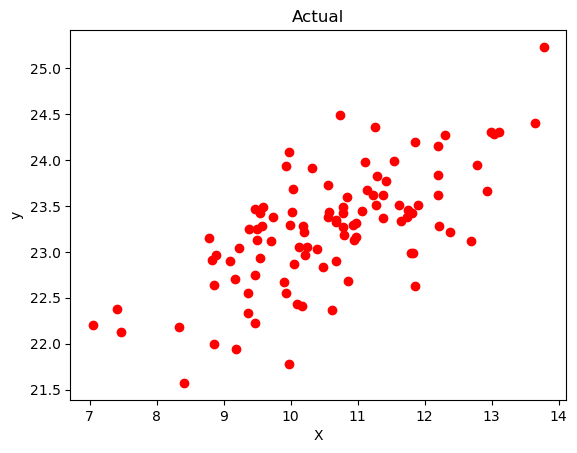

In [10]:
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [11]:
def loss_function(m1, m2, m3, m4,b, points):
    total_error =0
    for i in range(len(points)):
        x=points.iloc[i].StudyTime
        yy=points.iloc[i].Score
        total_error += (yy-(m1*(x) + m2*(x**2) + m3*(x**3) + m4*(x**4) +b))**2
    return total_error/ float(len(points))    
    
    

In [12]:
def gradient_descent(m1_now, m2_now,m3_now,m4_now,b_now,points,L):
    m1_gradient =0
    m2_gradient =0
    m3_gradient =0
    m4_gradient =0
    b_gradient =0
    n=len(points)
    
    for i in range(n):
        x=points.iloc[i].StudyTime
        yy= points.iloc[i].Score
        
        m1_gradient += -(2/n)*(x)*(yy-(m1_now*(x)+m2_now*(x**2) + m3_now*(x**3) + m4_now*(x**4) +b_now))
        m2_gradient += -(2/n)*(x**2)*(yy-(m1_now*(x)+m2_now*(x**2) + m3_now*(x**3) + m4_now*(x**4) +b_now))
        m3_gradient += -(2/n)*(x**3)*(yy-(m1_now*(x)+m2_now*(x**2) + m3_now*(x**3) + m4_now*(x**4) +b_now))
        m4_gradient += -(2/n)*(x**4)*(yy-(m1_now*(x)+m2_now*(x**2) + m3_now*(x**3) + m4_now*(x**4) +b_now))
        b_gradient += -(2/n)*(yy-(m1_now*(x)+m2_now*(x**2) + m3_now*(x**3) + m4_now*(x**4) +b_now))
        
    m1 = m1_now - m1_gradient *L
    m2 = m2_now - m2_gradient *L
    m3 = m3_now - m3_gradient *L
    m4 = m4_now - m4_gradient *L
    b = b_now - b_gradient *L
    return m1,m2,m3,m4,b
    

In [13]:
#m1 =((df['StudyTime'] - np.mean(X)) * (df['Score'] - np.mean(y))).sum()/((df['StudyTime'] - np.mean(X))**2).sum()
#m2 = ((df['StudyTime'] - np.mean(X)) * (df['Score'] - np.mean(y))).sum()/((df['StudyTime'] - np.mean(X))**2).sum()
m1 = 0
m2 = 0
m3 = 0
m4 = 0
#m1 = 0
#m2 = 0
b = 22
#b =np.mean(y) - (m * np.mean(X))
L= 1e-9  #try 0.008 and 0.009
epochs =5000
batch_size = len(df)
tp_batch = int(len(df)/float(batch_size))
print(f'Batch size = {tp_batch}')
print(m1)
print(m2)
print(m3)
print(m4)
print(b)

Batch size = 1
0
0
0
0
22


In [14]:
for i in range(epochs):
    if i% 50 == 0:
        print(f"Epoch: {i}")
        print(m1,m2,m3,m4,b)
    for j in range(0,batch_size):
        m1,m2,m3,m4,b = gradient_descent(m1,m2,m3,m4,b,df[j*tp_batch:(j+1)*tp_batch],L)
    
#print(m,b)

Epoch: 0
0 0 0 0 22
Epoch: 50
5.052131819684906e-06 3.725046936358083e-05 0.00020934628218032166 9.162231490778564e-05 22.000000612942546
Epoch: 100
9.119936119950696e-06 6.703285287951828e-05 0.0003725859382974625 7.673056546252041e-05 22.000001106858342
Epoch: 150
1.2417241067877747e-05 9.119235469992928e-05 0.0005047720463961825 6.467136867482308e-05 22.000001505800668
Epoch: 200
1.5090585345363196e-05 0.00011079837348192959 0.0006118105943084353 5.490600925462909e-05 22.00000182783226
Epoch: 250
1.7258637851753942e-05 0.000126716921939364 0.0006984843265382493 4.69982286680441e-05 22.000002087580484
Epoch: 300
1.901749817993752e-05 0.00013964930824721827 0.0007686663707725858 4.0594739173094164e-05 22.000002296890656
Epoch: 350
2.0444989009692874e-05 0.00015016346073777763 0.0008254932353628483 3.540944383655746e-05 22.000002465355514
Epoch: 400
2.160413214273937e-05 0.0001587192950403243 0.0008715049048986208 3.121065770178585e-05 22.000002600742953
Epoch: 450
2.2545963440392046e-

Epoch: 3500
2.7489975414862563e-05 0.00020768707708369863 0.0010651610427077536 1.3433154888060292e-05 22.00000286149087
Epoch: 3550
2.7506367118591543e-05 0.00020790398685672075 0.0010651220221916285 1.343489147323733e-05 22.000002856010905
Epoch: 3600
2.7522756159535582e-05 0.00020812088605085558 0.0010650829883285249 1.3436629343575644e-05 22.00000285053033
Epoch: 3650
2.753914260769426e-05 0.000208337775176596 0.0010650439439359898 1.3438368242107477e-05 22.000002845048584
Epoch: 3700
2.755552651976518e-05 0.00020855465464736294 0.0010650048912954867 1.3440107960669359e-05 22.000002839566527
Epoch: 3750
2.7571907941681573e-05 0.00020877152479801915 0.0010649658322546102 1.3441848330770566e-05 22.00000283408356
Epoch: 3800
2.7588286910658667e-05 0.00020898838589980732 0.0010649267683096176 1.344358921588651e-05 22.000002828600298
Epoch: 3850
2.7604663456841124e-05 0.00020920523817237355 0.0010648877006718017 1.3445330505534506e-05 22.000002823116624
Epoch: 3900
2.762103760466654e-05

In [15]:
#m=1.11
#b=8
ypred = m1*(X)+m2*(X**2)+m3*(X**3)+m4*(X**4) + b

In [16]:
z=loss_function(m1,m2,m3,m4, b, df)
z

0.32129686063874663

In [17]:
df.iloc[0].StudyTime


12.936518045494863

In [18]:
z= df.iloc[0].StudyTime * m1 + df.iloc[0].StudyTime**2 * m2 + df.iloc[0].StudyTime**3 * m3 + df.iloc[0].StudyTime**4 * m4 + b
z

24.717404634845714

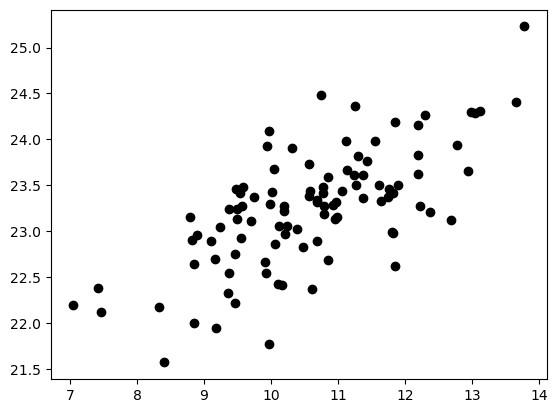

In [19]:
plt.scatter(df.StudyTime,df.Score,color="black")
#plt.plot(list(range(6,14)),[m*x+b for x in range(6,14)], color="red")
plt.show()

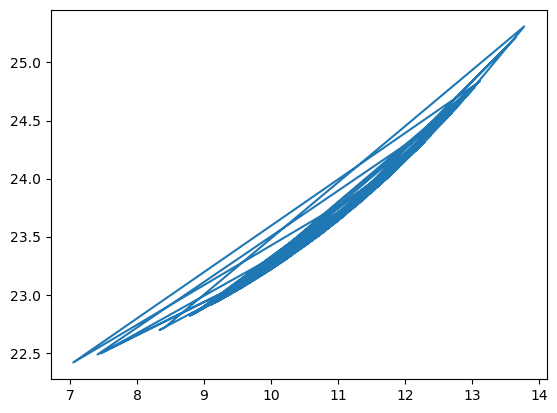

In [20]:
plt.plot(X, ypred,)     # regression line
plt.show()

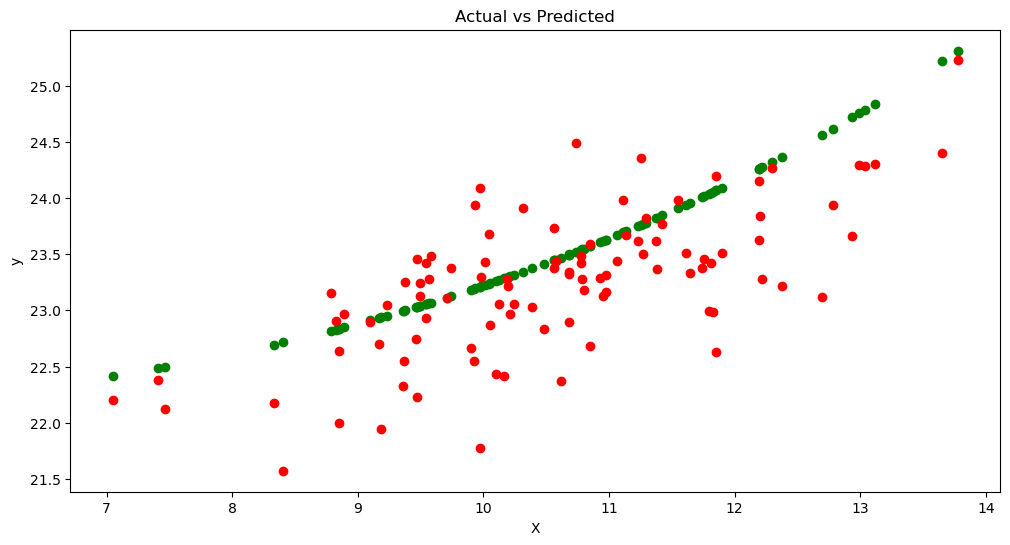

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.scatter(X, ypred, color='green')     # regression line
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [22]:
y = y.reshape(100,1)
ypred = ypred.reshape(100,1)
print(y.shape)
print(ypred.shape)
mae = mean_absolute_error(y,ypred)
rmse = math.sqrt(mean_squared_error(y,ypred))
print(mae)
print(rmse)

(100, 1)
(100, 1)
0.4429840653345788
0.5668305396136896


In [23]:
def predict(value):
    #value = X
    for i in range(value):
        # straight line = m*x+y
       print(i, ':',df.iloc[i].StudyTime,':',df.iloc[i].Score,':', m1 * (df.iloc[i].StudyTime)+m2*(df.iloc[i].StudyTime**2)+m3*(df.iloc[i].StudyTime**3)+m4*(df.iloc[i].StudyTime**4) + b,':',ypred[i])

In [24]:
predict(12)

0 : 12.936518045494863 : 23.65739113125546 : 24.717404634845714 : [24.71740463]
1 : 9.582365379524887 : 23.486963466260214 : 23.06980807505882 : [23.06980808]
2 : 9.707742371604816 : 23.114068532376844 : 23.113627895364594 : [23.1136279]
3 : 8.890547066765745 : 22.96395338164826 : 22.8491248551762 : [22.84912486]
4 : 11.798111443987018 : 22.991977510325583 : 24.03876072343097 : [24.03876072]
5 : 7.047691954679576 : 22.198998802933204 : 22.416567170584337 : [22.41656717]
6 : 13.11721764632472 : 24.305443519445554 : 24.837848772152103 : [24.83784877]
7 : 9.358189648657346 : 22.330606593693233 : 22.994441227862488 : [22.99444123]
8 : 10.978558644085648 : 23.160458340223883 : 23.62993524868646 : [23.62993525]
9 : 10.125944436783884 : 23.054090604381845 : 23.26872369665996 : [23.2687237]
10 : 12.693161905567461 : 23.12138991154686 : 24.560866641829346 : [24.56086664]
11 : 7.409788935753519 : 22.380516376747202 : 22.485489875115437 : [22.48548988]
